# (연습) 2차원 데이터

**준비사항**

Numpy와 Pandas 라이브러리를 각각 np와 pd라는 별칭으로 불러온다

In [2]:
import numpy as np
import pandas as pd

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [3]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터 저장소 디렉토리**

코드에 사용되는 데이터 저장소의 기본 디렉토리를 지정한다.

In [4]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**문제 1**

기본 데이터 저장소에 있는 `sc_weir.csv` 파일은
광주광력시에서부터 전라남도 나주를 거쳐 서해까지 이어지는 영산강에 설치된 승촌보에서 측정한
두 종류의 데이터를 담고 있다.

- `Chl-a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `Discharge`: 보에서 방출되는 시간당 방류량 수치 100개

클로로필-A 농도가 높을 수록 수질(water quality)이 나빠지며, 방류량이 많을 수록 클로로필-A 농도는 일반적으로 떨어지며,
두 데이터 사이의 상관관계를 확인하기 위해 수집되었다.

In [16]:
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_df

,Chl-a,Discharge
0,51,25
1,51,25
2,53,24
3,53,24
4,54,22
...,...,...
95,122,9
96,122,9
97,124,49
98,125,9


항목만으로 구성된 넘파이 어레이를 선언한다.

In [6]:
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape

(100, 2)

두 데이터를 별도의 어레이로 지정한다.

In [7]:
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]

(1) 클로로필-A와 시간당 방류량 사이의 공분산을 계산하고 두 데이터 사이의 상관관계를 설명하라.

- 넘파이 활용

In [8]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.

cov_mat = np.cov(chl_a_arr, discharge_arr, ddof=0)
cov_mat

#공분산이 음수라는 것은 두 변수간의 반비례관계가 있음을 의미한다.

array([[506.8004, -66.2198],
       [-66.2198,  40.2851]])

- 데이터프레임 활용

In [9]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
sc_weir_df.cov()

,Chl-a,Discharge
Chl-a,511.919596,-66.888687
Discharge,-66.888687,40.692020


(2) 클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고 두 데이터 사이의 선형 상관관계를 설명하라.

- 넘파이 활용

In [10]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
np.corrcoef(chl_a_arr,discharge_arr)  #중간정도의 음의 상관관계?

array([[ 1.       , -0.4634439],
       [-0.4634439,  1.       ]])

- 데이터프레임 활용

In [19]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
sc_weir_df.corr()
np.sort(chl_a_arr)

array([ 51,  51,  53,  53,  54,  55,  57,  57,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  67,  67,  69,  70,  71,  71,  72,  73,  75,
        75,  76,  77,  79,  81,  81,  83,  83,  85,  86,  87,  88,  88,
        88,  89,  89,  90,  91,  92,  95,  96,  96,  97,  98,  98,  98,
        99, 101, 101, 102, 102, 103, 104, 104, 104, 104, 105, 106, 107,
       108, 110, 111, 111, 112, 112, 112, 113, 114, 114, 116, 116, 116,
       117, 118, 118, 118, 118, 119, 120, 120, 120, 121, 121, 121, 121,
       122, 122, 122, 122, 122, 124, 124, 125, 125])

(3) x-축을 방류량, y-축을 클로로필-A 수치로 지정한 다음 산점도를 그린다.

- 넘파이 활용

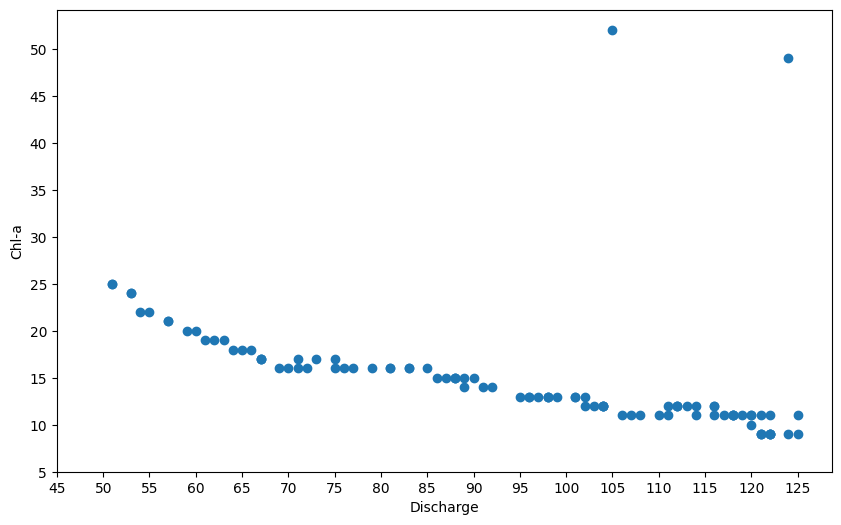

array([ 9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       19, 19, 19, 20, 20, 21, 21, 22, 22, 24, 24, 25, 25, 49, 52])

In [22]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.

plt.scatter(chl_a_arr, discharge_arr)
plt.xlabel('Discharge')
plt.ylabel('Chl-a')

plt.xticks(range(45,130,5))
plt.yticks(range(5,55,5))

plt.show()
np.sort(discharge_arr)

- 데이터프레임 활용

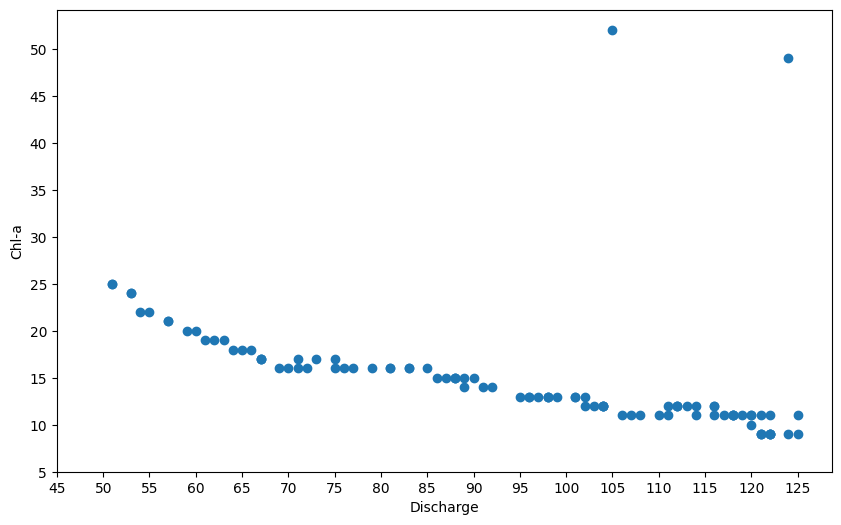

In [15]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
plt.scatter(sc_weir_df['Chl-a'],sc_weir_df['Discharge'])
plt.xlabel('Discharge')
plt.ylabel('Chl-a')

plt.xticks(range(45, 130, 5))
plt.yticks(range(5, 55, 5))

plt.show()

(4) 위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(5) 클로로필-A 데이터와 방수량 두 데이터셋 모두에서 이상치에 해당하는 두 개의 값을 제거한다.

- 데이터프레임 활용

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(6) 이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려본다.

- 데이터프레임 활용

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(7) 이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 방류량과 관련하여 아래 값들이 어떻게 달라졌는지 확인한다.
단, 공분산과 피어슨 상관계수는 클로로필-A 데이터와 관련해서 계산한다.

- 평균값
- 중앙값
- 최빈값
- 범위
- 사분범위
- 분산
- 표준편차
- 공분산
- 피어슨 상관계수

힌트: 데이터프레임만 활용

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 2**

기본 데이터 저장소에 있는 `california_housing.csv` 파일은 미국 캘리포니아 주의 주택 정보를 담고 있다.
위 파일의 내용을 데이터프레임으로 불러와서 `housing_df` 변수에 할당한다.

In [ ]:
housing_df = pd.read_csv(data_url+"california_housing.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(1) 주택중위가격(median_house_value) 특성과 다른 수치형 특성 사이의 선형 상관계수를 나타내는 상관계수를 확인하라.

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.

import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True
%precision 6
pd.set_option('display.precision', 6)
import matplotlib.pyplot as plt
print(housing_df.dtypes)

# 필요에 따라 문자열 열 처리
housing_df = pd.get_dummies(housing_df)
correlation_matrix = housing_df.corr()

# 올바른 열 이름 사용
median_house_value_corr = correlation_matrix['median_house_value']
print(median_house_value_corr)

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN        bool
ocean_proximity_INLAND           bool
ocean_proximity_ISLAND           bool
ocean_proximity_NEAR BAY         bool
ocean_proximity_NEAR OCEAN       bool
dtype: object
longitude                    -0.045967
latitude                     -0.144160
housing_median_age            0.105623
total_rooms                   0.134153
total_bedrooms                0.049686
population                   -0.024650
households                    0.065843
median_income                 0.688075
median_house_value            1.000000
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_INLAND       -0.484859
ocean_proximity_ISLAND   

(2) 확인된 상관계수를 바탕으로 주택중위가격과 가장 상관관계가 높은 특성을 확인하고 그 이유를 추정하라.

힌트: `sort_values()` 메서드 활용

In [ ]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
sorted_corr = median_house_value_corr.sort_values(ascending=False)
print(sorted_corr)

#일반적으로 소득이 높을수록 사람들이 더 비싼 주택을 구매할수 있기 때문에 주택 중위 가격은 지역의 평균 소득 수준에 따라 달라질 수 있다.


median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64
